In [12]:
import pandas as pd

df = pd.read_csv('AB_NYC_2019.csv')
display(df.head())
display(df.info())

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

None

In [13]:
display(df.isnull().sum())

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [14]:
# Handle missing values
# 'name' and 'host_name' have a small number of missing values, fill with 'Unknown'
df['name'].fillna('Unknown', inplace=True)
df['host_name'].fillna('Unknown', inplace=True)

# 'last_review' and 'reviews_per_month' have a large number of missing values.
# These likely correspond to listings with no reviews.
# Fill 'last_review' with a placeholder (e.g., 'No reviews') and 'reviews_per_month' with 0.
df['last_review'].fillna('No reviews', inplace=True)
df['reviews_per_month'].fillna(0, inplace=True)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Verify missing values are handled
display(df.isnull().sum())

# Verify duplicate rows are removed
display(f'Number of rows after removing duplicates: {df.shape[0]}')

<ipython-input-14-c63db42f8c7d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['name'].fillna('Unknown', inplace=True)
<ipython-input-14-c63db42f8c7d>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


'Number of rows after removing duplicates: 48895'

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,7.143982,112.781327
std,240.154170,20.510550,44.550582,32.952519,131.622289
min,0.000000,1.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,327.000000,365.000000


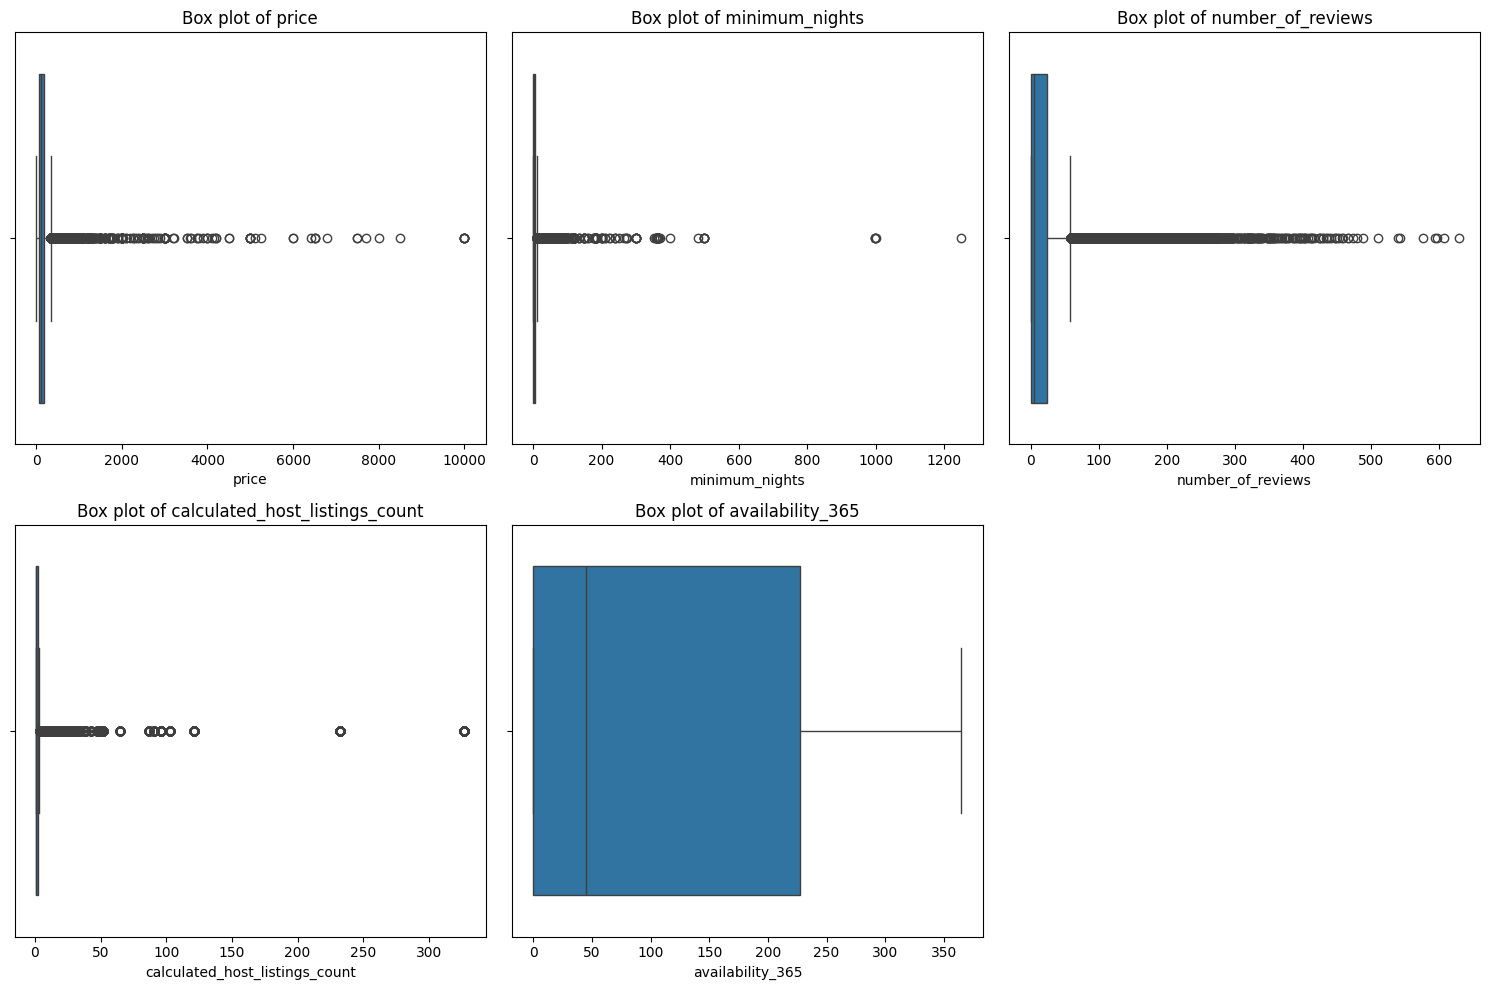

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze key numerical columns for potential outliers using descriptive statistics
numerical_cols = ['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']
display(df[numerical_cols].describe())

# Visualize the distributions using box plots to identify potential outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,46627.000000,46627.000000,46627.000000,46627.000000,46627.000000
mean,139.030240,5.010445,24.149377,2.485513,106.615094
std,116.282946,7.391245,45.263524,5.042225,128.795087
min,0.000000,1.000000,0.000000,1.000000,0.000000
25%,68.000000,1.000000,1.000000,1.000000,0.000000
50%,100.000000,2.000000,6.000000,1.000000,37.000000
75%,172.500000,4.000000,25.000000,2.000000,205.000000
max,1000.000000,30.000000,629.000000,50.000000,365.000000


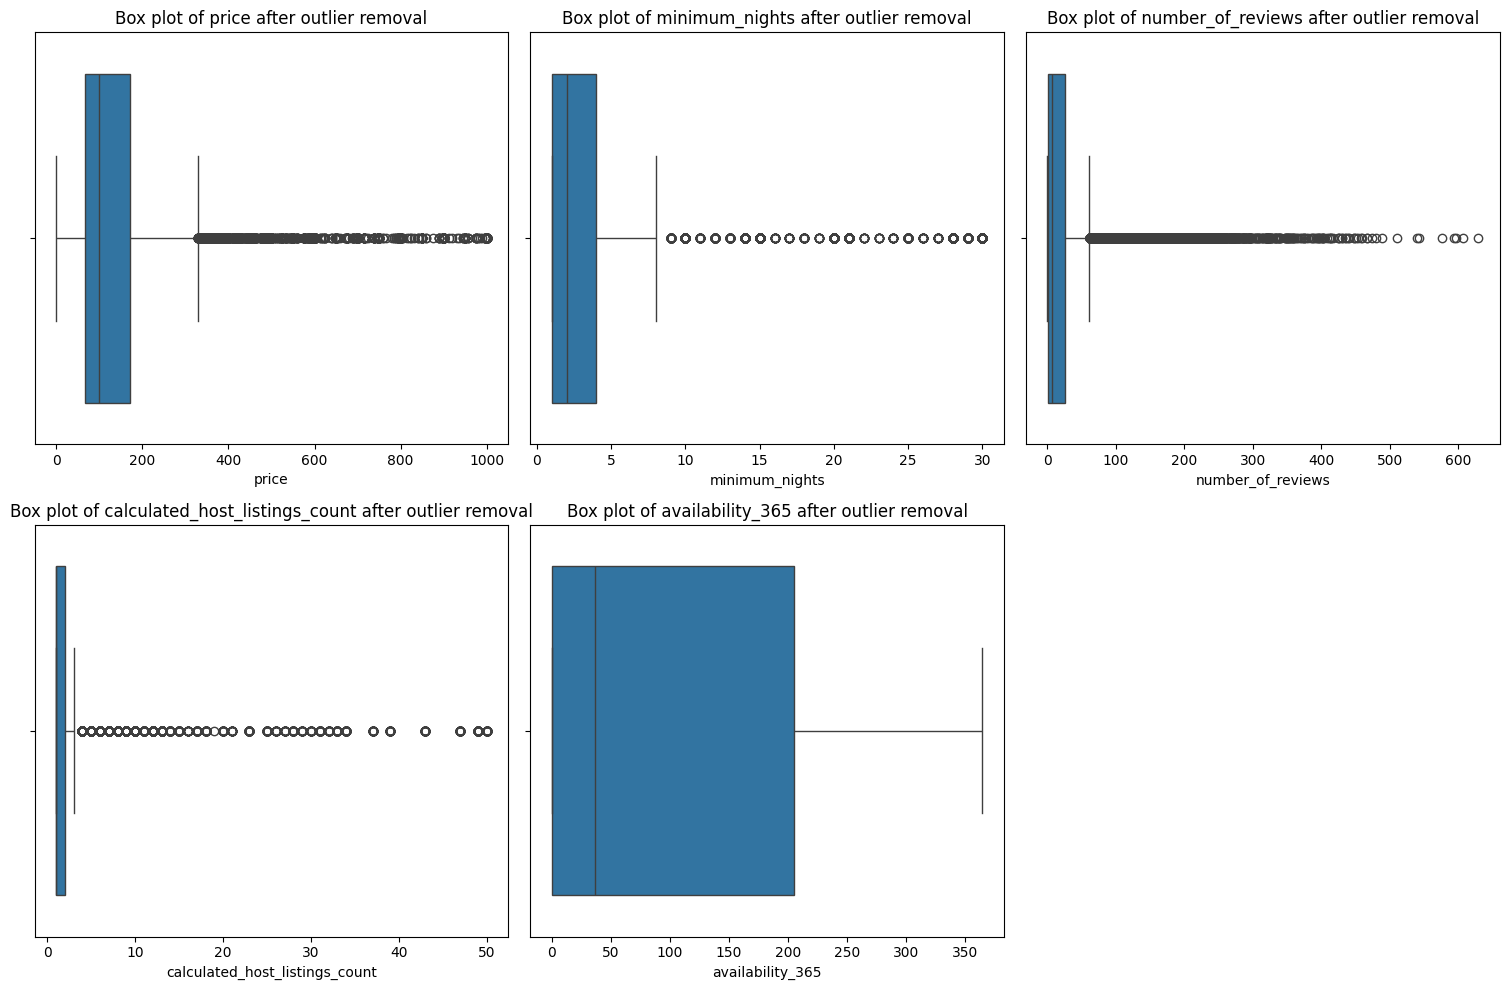

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


'Number of rows after outlier removal: 46627'

In [16]:
# Address outliers
# For 'price', remove rows with price > 1000 (a reasonable upper limit based on domain knowledge/observation)
df = df[df['price'] <= 1000]

# For 'minimum_nights', remove rows with minimum_nights > 30 (assuming stays longer than a month are less common or represent a different type of listing)
df = df[df['minimum_nights'] <= 30]

# For 'calculated_host_listings_count', remove rows with a very high count, e.g., > 50
df = df[df['calculated_host_listings_count'] <= 50]

# Re-analyze key numerical columns for potential outliers using descriptive statistics after outlier removal
numerical_cols = ['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']
display(df[numerical_cols].describe())

# Visualize the distributions again using box plots to see the impact of outlier removal
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col} after outlier removal')
plt.tight_layout()
plt.show()

# Verify missing values and duplicates after cleaning steps
display(df.isnull().sum())
display(f'Number of rows after outlier removal: {df.shape[0]}')

In [17]:
# 1. Display descriptive statistics
display("Descriptive Statistics:")
display(df.describe(include='all'))

# 2. Examine data types
display("\nData Types:")
display(df.info())

# 3. Identify categorical columns and display value counts
display("\nCategorical Column Value Counts:")
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    display(f"\nValue counts for '{col}':")
    display(df[col].value_counts())

# 4. Check for remaining missing values
display("\nRemaining Missing Values:")
display(df.isnull().sum())

'Descriptive Statistics:'

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.662700e+04,46627,4.662700e+04,46627,46627,46627,46627.000000,46627.000000,46627,46627.000000,46627.000000,46627.000000,46627,46627.000000,46627.000000,46627.000000
unique,NaN,45704,NaN,11300,5,221,NaN,NaN,3,NaN,NaN,NaN,1748,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,No reviews,NaN,NaN,NaN
freq,NaN,18,NaN,392,19914,3856,NaN,NaN,23530,NaN,NaN,NaN,8952,NaN,NaN,NaN
mean,1.888337e+07,NaN,6.675944e+07,NaN,NaN,NaN,40.728483,-73.951032,NaN,139.030240,5.010445,24.149377,NaN,1.127067,2.485513,106.615094
std,1.095301e+07,NaN,7.827776e+07,NaN,NaN,NaN,0.055145,0.046431,NaN,116.282946,7.391245,45.263524,NaN,1.618887,5.042225,128.795087
min,2.539000e+03,NaN,2.571000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.000000,1.000000,0.000000
25%,9.367630e+06,NaN,7.659942e+06,NaN,NaN,NaN,40.689170,-73.982075,NaN,68.000000,1.000000,1.000000,NaN,0.050000,1.000000,0.000000
50%,1.953052e+07,NaN,3.049880e+07,NaN,NaN,NaN,40.722080,-73.954830,NaN,100.000000,2.000000,6.000000,NaN,0.410000,1.000000,37.000000
75%,2.889305e+07,NaN,1.050529e+08,NaN,NaN,NaN,40.763260,-73.934950,NaN,172.500000,4.000000,25.000000,NaN,1.660000,2.000000,205.000000


'\nData Types:'

<class 'pandas.core.frame.DataFrame'>
Index: 46627 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              46627 non-null  int64  
 1   name                            46627 non-null  object 
 2   host_id                         46627 non-null  int64  
 3   host_name                       46627 non-null  object 
 4   neighbourhood_group             46627 non-null  object 
 5   neighbourhood                   46627 non-null  object 
 6   latitude                        46627 non-null  float64
 7   longitude                       46627 non-null  float64
 8   room_type                       46627 non-null  object 
 9   price                           46627 non-null  int64  
 10  minimum_nights                  46627 non-null  int64  
 11  number_of_reviews               46627 non-null  int64  
 12  last_review                     46627

None

'\nCategorical Column Value Counts:'

"\nValue counts for 'name':"

,count
name,
Hillside Hotel,18
Home away from home,17
New york Multi-unit building,15
Unknown,15
Brooklyn Apartment,12
...,...
Spacious Bedroom in the heart of Bedstuy,1
Your own 2 Bedroom apartment available for 3 weeks,1
1 bedroom in a 3 bedroom apartment,1


"\nValue counts for 'host_name':"

,count
host_name,
Michael,392
David,392
John,291
Alex,277
Sarah,224
...,...
Xiaolan,1
LuxuryApartmentsByAmber,1
Pirro,1


"\nValue counts for 'neighbourhood_group':"

,count
neighbourhood_group,
Manhattan,19914
Brooklyn,19744
Queens,5525
Bronx,1077
Staten Island,367


"\nValue counts for 'neighbourhood':"

,count
neighbourhood,
Williamsburg,3856
Bedford-Stuyvesant,3669
Harlem,2596
Bushwick,2437
Upper West Side,1845
...,...
Richmondtown,1
Fort Wadsworth,1
New Dorp,1


"\nValue counts for 'room_type':"

,count
room_type,
Entire home/apt,23530
Private room,21956
Shared room,1141


"\nValue counts for 'last_review':"

,count
last_review,
No reviews,8952
2019-06-23,1393
2019-07-01,1352
2019-06-30,1329
2019-06-24,858
...,...
2017-03-15,1
2017-01-12,1
2016-11-02,1


'\nRemaining Missing Values:'

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


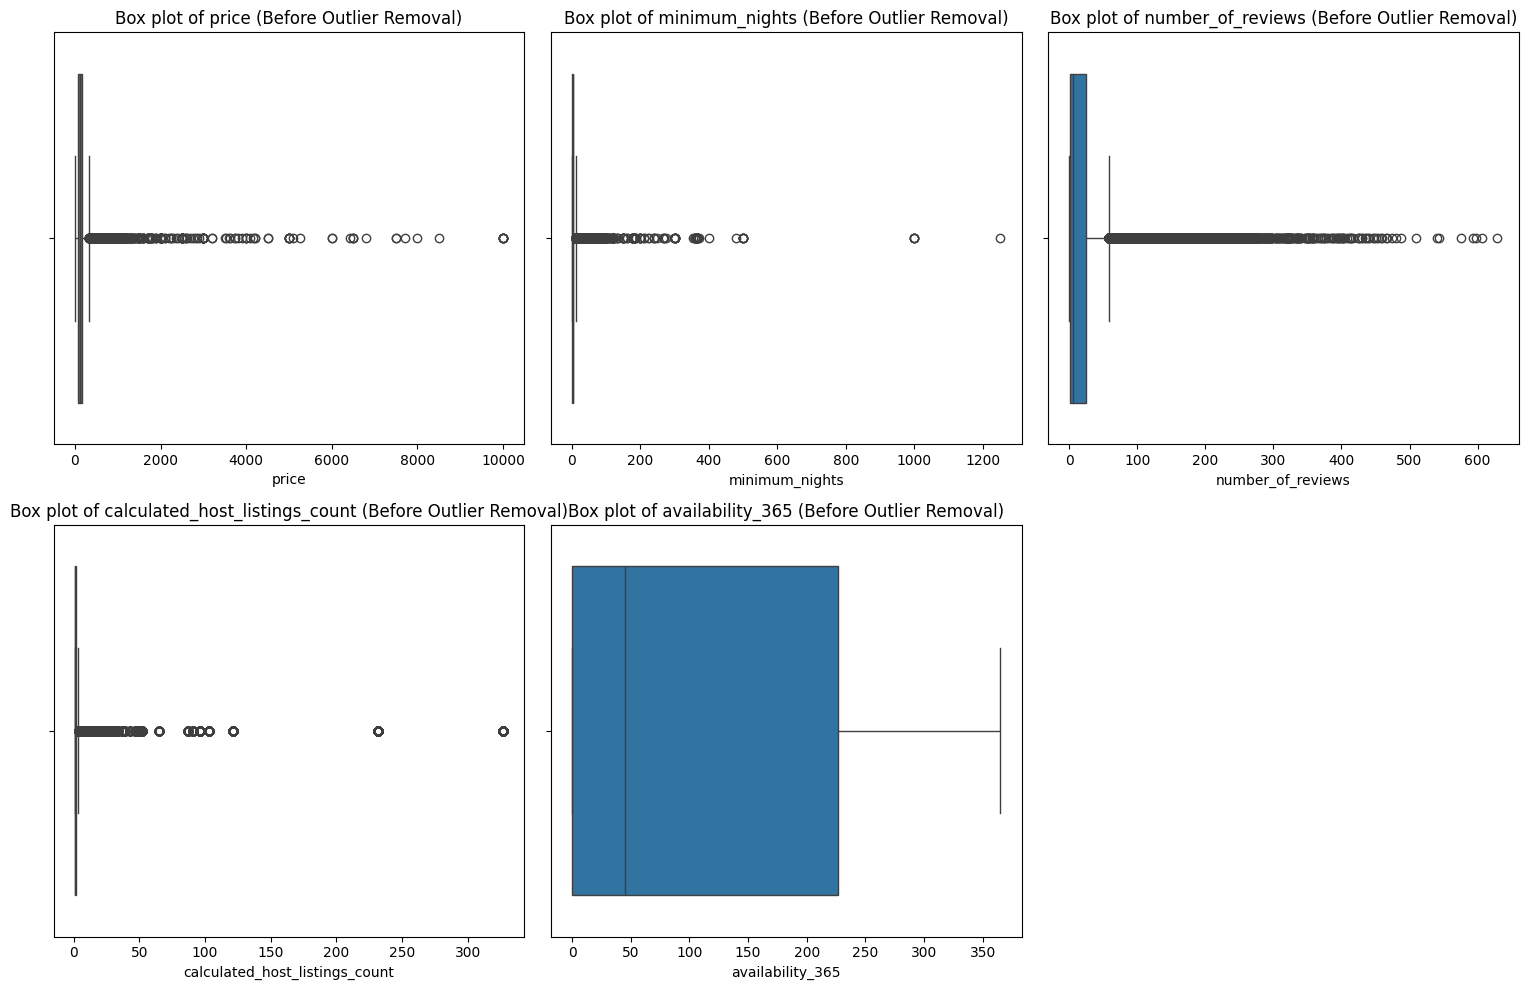

In [18]:
# Reload the original data to visualize distributions before outlier removal
df_original = pd.read_csv('AB_NYC_2019.csv')

numerical_cols = ['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']

# Visualize the distributions before outlier removal using box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df_original[col])
    plt.title(f'Box plot of {col} (Before Outlier Removal)')
plt.tight_layout()
plt.show()

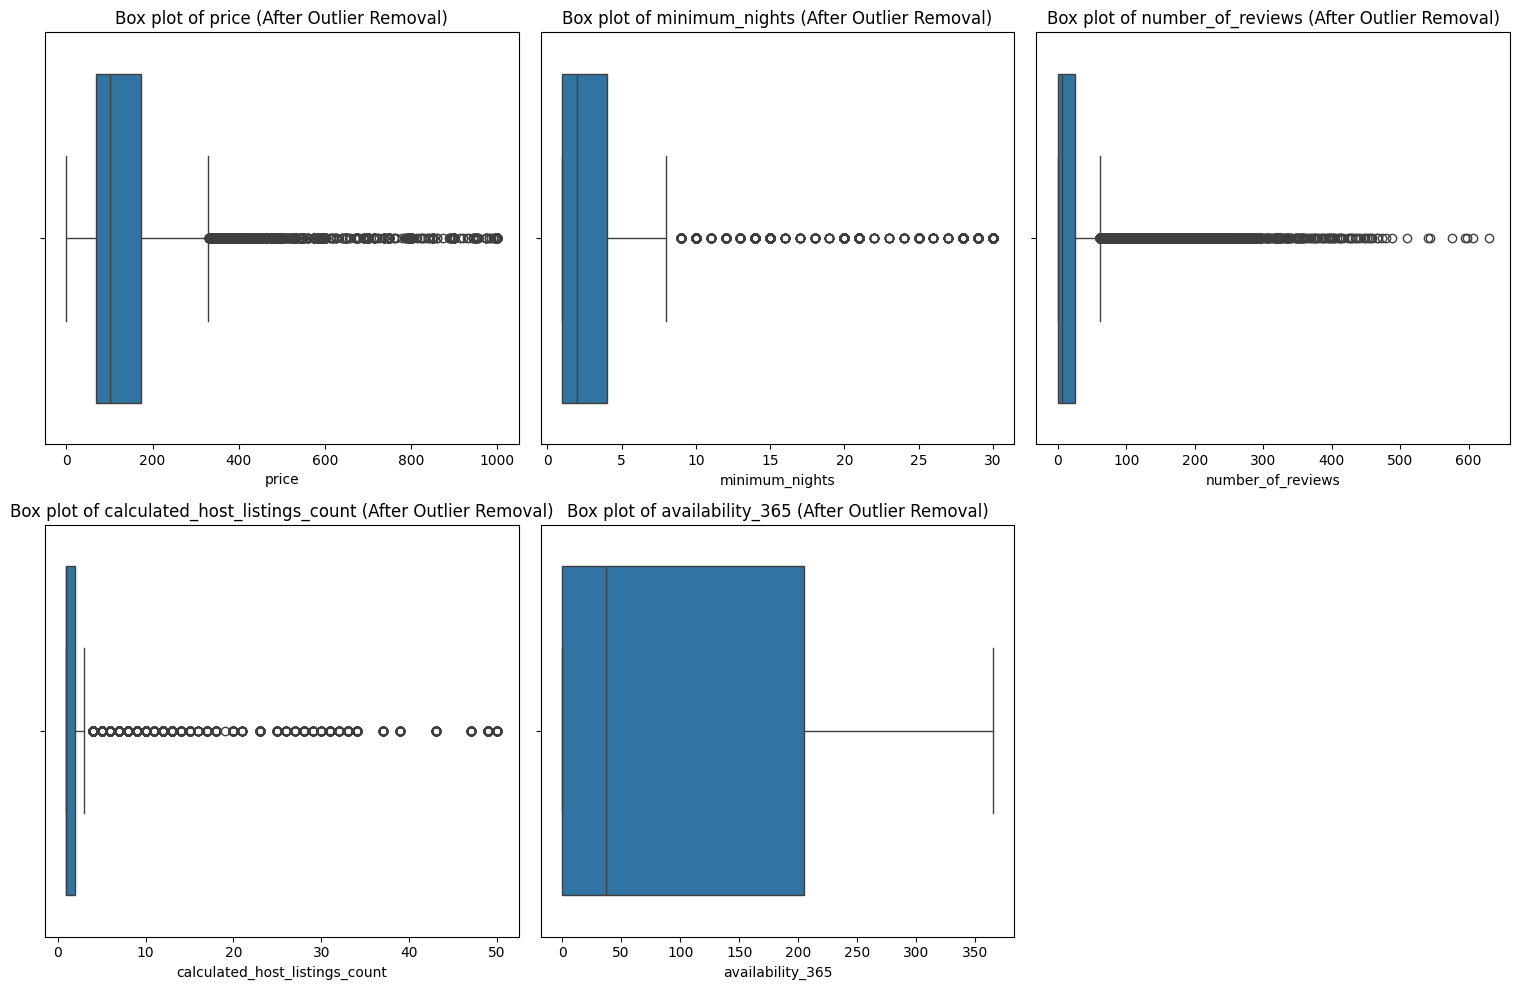

In [19]:
# Visualize the distributions after outlier removal using box plots (using the cleaned df)
numerical_cols = ['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col} (After Outlier Removal)')
plt.tight_layout()
plt.show()

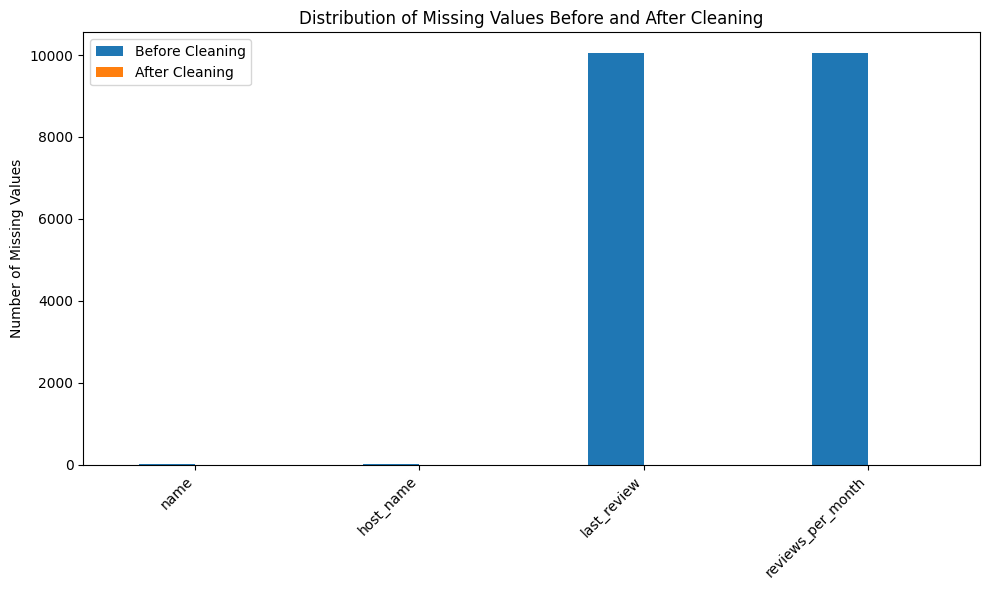

In [20]:
# Calculate missing values before and after handling
missing_before = df_original.isnull().sum()
missing_after = df.isnull().sum()

# Create a DataFrame for visualization
missing_comparison = pd.DataFrame({'Before Cleaning': missing_before, 'After Cleaning': missing_after})

# Filter for columns that had missing values
missing_comparison = missing_comparison[(missing_comparison['Before Cleaning'] > 0) | (missing_comparison['After Cleaning'] > 0)]

# Create bar plot
missing_comparison.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Missing Values Before and After Cleaning')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-21-1dd4009c582a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='neighbourhood_group', data=df, order=df['neighbourhood_group'].value_counts().index, palette='viridis')
<ipython-input-21-1dd4009c582a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='room_type', data=df, order=df['room_type'].value_counts().index, palette='viridis')


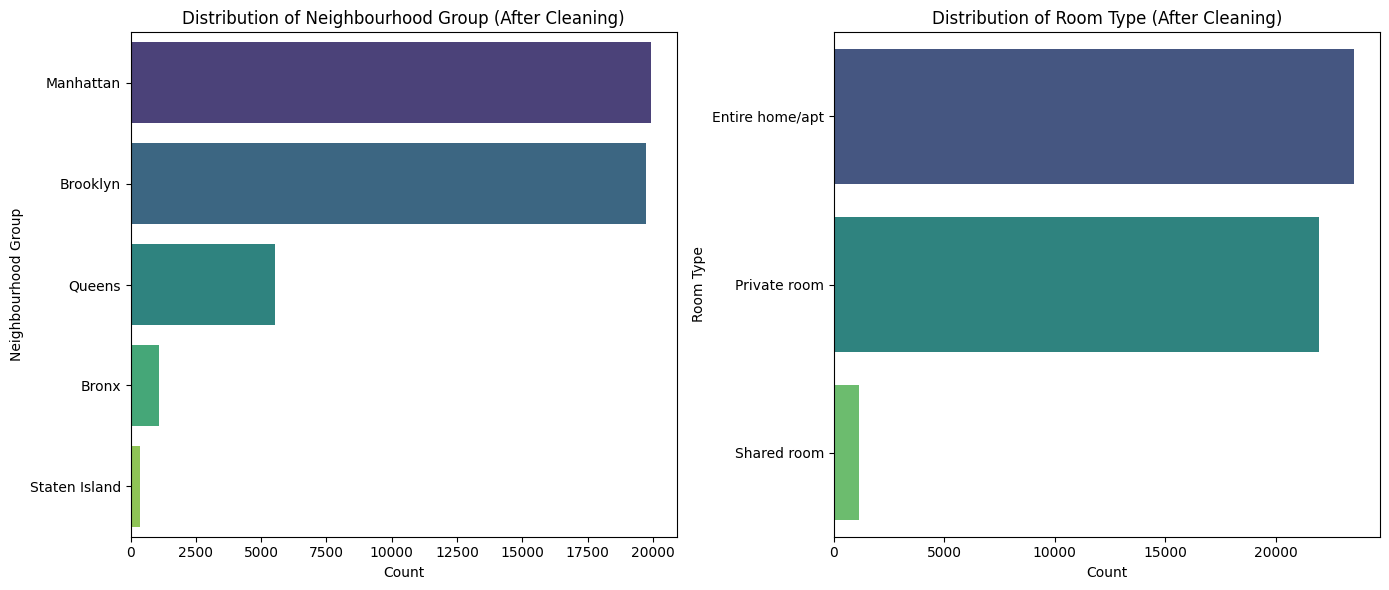

In [21]:
# Visualize the distribution of key categorical variables
categorical_vars = ['neighbourhood_group', 'room_type']

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(y='neighbourhood_group', data=df, order=df['neighbourhood_group'].value_counts().index, palette='viridis')
plt.title('Distribution of Neighbourhood Group (After Cleaning)')
plt.xlabel('Count')
plt.ylabel('Neighbourhood Group')

plt.subplot(1, 2, 2)
sns.countplot(y='room_type', data=df, order=df['room_type'].value_counts().index, palette='viridis')
plt.title('Distribution of Room Type (After Cleaning)')
plt.xlabel('Count')
plt.ylabel('Room Type')

plt.tight_layout()
plt.show()

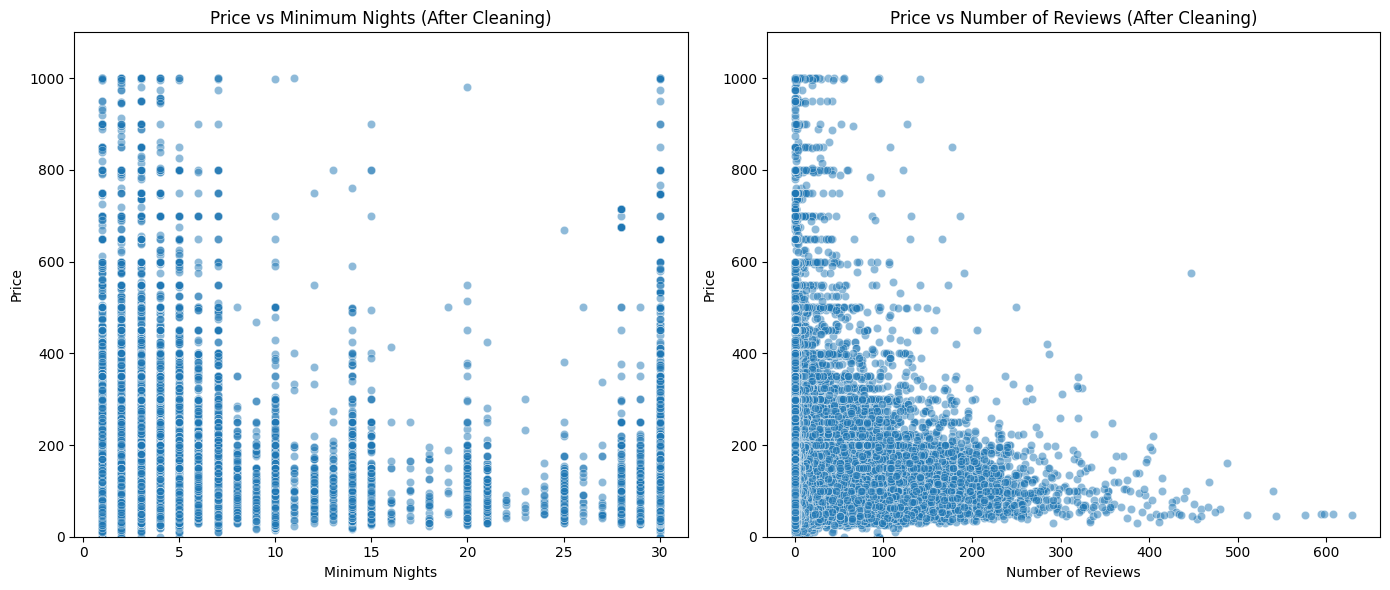

In [22]:
# Explore relationships between numerical variables
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='minimum_nights', y='price', data=df, alpha=0.5)
plt.title('Price vs Minimum Nights (After Cleaning)')
plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.ylim(0, 1100) # Set a reasonable y-limit after outlier removal

plt.subplot(1, 2, 2)
sns.scatterplot(x='number_of_reviews', y='price', data=df, alpha=0.5)
plt.title('Price vs Number of Reviews (After Cleaning)')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.ylim(0, 1100) # Set a reasonable y-limit after outlier removal

plt.tight_layout()
plt.show()

In [23]:
# Summary:
# Data Analysis Key Findings
# Initially, the dataset contained 48,895 entries and 16 columns, with missing values present in the name, host_name, last_review, and reviews_per_month columns.
# The original data showed significant outliers in numerical columns like price, minimum_nights, and calculated_host_listings_count, as indicated by descriptive statistics and box plots with extremely high maximum values.
# After cleaning, which involved filling missing values and removing rows with extreme outliers (price > $1000, minimum_nights > 30, calculated_host_listings_count > 50), the dataset size was reduced to 46,627 rows.
# Post-cleaning analysis confirmed that all missing values were addressed and the distributions of numerical columns were significantly less skewed, making them more interpretable.
# Insights or Next Steps
# The cleaned dataset is now suitable for further analysis, such as exploring relationships between features or building predictive models.
# Investigating the reasons behind the high host listing counts and extremely high prices in the original data could provide further context about the platform's usage and identify potential data entry issues.
